# Abhishek Bhati TANLP Assignment 3
## Sentiment Identification
## Train a Sentiment classifier (Positive,Negative,Neutral) on a corpus of the provided Document.

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
import re
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from nltk import word_tokenize
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
dataset = pd.read_csv('Roman Urdu DataSet.csv', names=['comment', 'sentiment', 'nan'])
dataset.head()

,comment,sentiment,nan
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive,NaN
1,sahi bt h,Positive,NaN
2,"Kya bt hai,",Positive,NaN
3,Wah je wah,Positive,NaN
4,Are wha kaya bat hai,Positive,NaN


## Representation of Sentiments

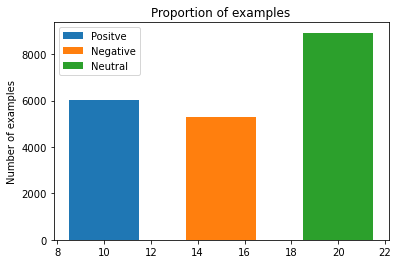

In [3]:
Pos = dataset[dataset['sentiment'] == 'Positive'].shape[0]
Neg = dataset[dataset['sentiment'] == 'Negative'].shape[0]
Neu = dataset[dataset['sentiment'] == 'Neutral'].shape[0]
plt.bar(10,Pos,3, label="Positve")
plt.bar(15,Neg,3, label="Negative")
plt.bar(20,Neu,3, label="Neutral")
plt.legend()
plt.ylabel('Number of examples')
plt.title('Proportion of examples')
plt.show()

In [4]:
y = dataset['sentiment']

## Data Cleaning

In [5]:
stopwords=['ai', 'ayi', 'hy', 'hai', 'main', 'ki', 'tha', 'koi', 'ko', 'sy', 'woh', 'bhi', 'aur', 'wo', 'yeh', 'rha', 'hota', 'ho', 'ga', 'ka', 'le', 'lye', 'kr', 'kar', 'lye', 'liye', 'hotay', 'waisay', 'gya', 'gaya', 'kch', 'ab', 'thy', 'thay', 'houn', 'hain', 'han', 'to', 'is', 'hi', 'jo', 'kya', 'thi', 'se', 'pe', 'phr', 'wala', 'waisay', 'us', 'na', 'ny', 'hun', 'rha', 'raha', 'ja', 'rahay', 'abi', 'uski', 'ne', 'haan', 'acha', 'nai', 'sent', 'photo', 'you', 'kafi', 'gai', 'rhy', 'kuch', 'jata', 'aye', 'ya', 'dono', 'hoa', 'aese', 'de', 'wohi', 'jati', 'jb', 'krta', 'lg', 'rahi', 'hui', 'karna', 'krna', 'gi', 'hova', 'yehi', 'jana', 'jye', 'chal', 'mil', 'tu', 'hum', 'par', 'hay', 'kis', 'sb', 'gy', 'dain', 'krny', 'tou']


In [6]:
def clean(x):
    review_with_no_special_character = re.sub('[^a-zA-Z]',' ',str(x))
    review_in_lowercase = review_with_no_special_character.lower()
    review_in_tokens = word_tokenize(review_in_lowercase)
    review_with_no_stopwords = [word for word in review_in_tokens if not word in stopwords]
    review_in_sentence = ' '.join(review_with_no_stopwords)
    return review_in_sentence

In [7]:
dataset['comment'] = dataset['comment'].apply(lambda x:clean(x))

In [8]:
X = dataset['comment']

## Spliting the Data

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Coverting the data to vactors
* Using TFIDF Vectorizer

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vector = vectorizer.fit_transform(X_train)
X_test_vector = vectorizer.transform(X_test)

## Model1: SVC

In [11]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', C=1.0, degree=3, random_state=0)
classifier.fit(X_train_vector, y_train)

SVC(kernel='linear', random_state=0)

In [12]:
y_pred=classifier.predict(X_test_vector)

In [13]:
ConfusionMatrix=confusion_matrix(y_test, y_pred)

In [14]:
import warnings
warnings.filterwarnings('ignore')

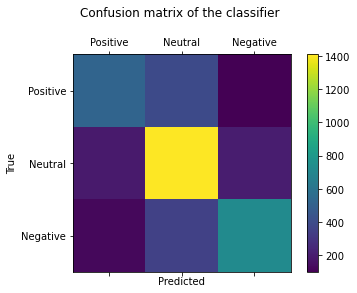

In [15]:
labels=['Positive','Neutral','Negative']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(ConfusionMatrix)
plt.title('Confusion matrix of the classifier \n')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Model2 LogisticRegression

In [16]:
#classifier
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0,solver='liblinear',multi_class='ovr')
classifier.fit(X_train_vector,y_train)
y_pred=classifier.predict(X_test_vector)
print(y_pred)

['Neutral' 'Negative' 'Neutral' ... 'Neutral' 'Positive' 'Neutral']


In [17]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 441  463  117]
 [ 143 1462  206]
 [  98  410  706]]


In [18]:
print('Accuracy is {} '.format(accuracy_score(y_test, y_pred)))


Accuracy is 0.6448344043499753 


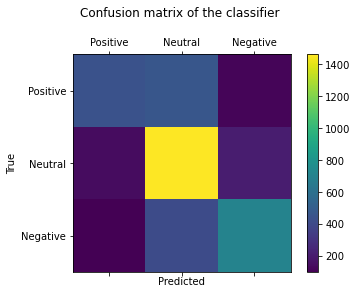

In [19]:
labels=['Positive','Neutral','Negative']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier \n')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Conclusion -
## Based on the analysis of the data/customer comments we can say that
* The Sentiment of the customer is neutral in most of the cases.
* Both the positive and negative sentiments are mostly equal.
* There are some number of people with negative sentiment. 